In [ ]:
# For numerical operations, especially useful for handling embedding vectors.
import numpy as np

# For data manipulation and analysis, often used when embeddings are stored in a tabular format.
import pandas as pd

# For scientific computing, including advanced mathematical functions and statistical tools.
# Specifically, it can be used for distance calculations, such as cosine similarity.
from scipy.spatial.distance import cosine

# For creating static, interactive, and animated visualizations in Python.
# It's a foundational library for plotting.
import matplotlib.pyplot as plt

# A data visualization library based on matplotlib that provides a high-level interface
# for drawing attractive and informative statistical graphics.
import seaborn as sns


In [ ]:
# Install gensim for loading pre-trained word embeddings
%pip install gensim


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 47.2 MB/s eta 0:00:00


In [ ]:
import gensim.downloader as api

# Load a pre-trained GloVe model. Using a smaller model (glove-wiki-gigaword-50) for demonstration purposes.
# This might take some time to download the first time.
print("Downloading pre-trained GloVe model...")
word_vectors = api.load("glove-wiki-gigaword-50")
print("Model loaded successfully!")

# Print the vocabulary size
vocabulary_size = len(word_vectors.key_to_index)
print(f"\nVocabulary Size: {vocabulary_size}")

# Display example word vectors for a few words
example_words = ['king', 'queen', 'man', 'woman', 'apple', 'banana', 'computer']
print("\nExample Word Vectors:")
for word in example_words:
    if word in word_vectors:
        print(f"'{word}': {word_vectors[word][:5]}... (first 5 dimensions)")
    else:
        print(f"'{word}': Not found in vocabulary")


[==================================================] 100.0% 66.0/66.0MB downloaded
Model loaded successfully!

Vocabulary Size: 400000

Example Word Vectors:
'king': [ 0.50451   0.68607  -0.59517  -0.022801  0.60046 ]... (first 5 dimensions)
'queen': [ 0.37854  1.8233  -1.2648  -0.1043   0.35829]... (first 5 dimensions)
'man': [-0.094386  0.43007  -0.17224  -0.45529   1.6447  ]... (first 5 dimensions)
'woman': [-0.18153  0.64827 -0.5821  -0.49451  1.5415 ]... (first 5 dimensions)
'apple': [ 0.52042 -0.8314   0.49961  1.2893   0.1151 ]... (first 5 dimensions)
'banana': [-0.25522 -0.75249 -0.86655  1.1197   0.12887]... (first 5 dimensions)
'computer': [ 0.079084 -0.81504   1.7901    0.91653   0.10797 ]... (first 5 dimensions)


In [ ]:
def calculate_and_print_similarity(word1, word2, model):
    """Calculates and prints the cosine similarity between two words."""
    if word1 in model and word2 in model:
        similarity = model.similarity(word1, word2)
        print(f"Similarity between '{word1}' and '{word2}': {similarity:.4f}")
    else:
        not_found = []
        if word1 not in model: not_found.append(word1)
        if word2 not in model: not_found.append(word2)
        print(f"One or both words not found in vocabulary: {', '.join(not_found)}")


print("\n--- Word Similarity Calculations ---")

# Define at least 10 word pairs to compare
word_pairs = [
    ('doctor', 'nurse'),
    ('cat', 'dog'),
    ('car', 'bus'),
    ('king', 'queen'),
    ('man', 'woman'),
    ('happy', 'joyful'),
    ('sad', 'unhappy'),
    ('computer', 'software'),
    ('tree', 'forest'),
    ('ocean', 'sea'),
    ('fast', 'quick'),
    ('slow', 'rapid') # Adding an extra for good measure
]

for word1, word2 in word_pairs:
    calculate_and_print_similarity(word1, word2, word_vectors)



--- Word Similarity Calculations ---
Similarity between 'doctor' and 'nurse': 0.7977
Similarity between 'cat' and 'dog': 0.9218
Similarity between 'car' and 'bus': 0.8211
Similarity between 'king' and 'queen': 0.7839
Similarity between 'man' and 'woman': 0.8860
Similarity between 'happy' and 'joyful': 0.5550
Similarity between 'sad' and 'unhappy': 0.6350
Similarity between 'computer' and 'software': 0.8815
Similarity between 'tree' and 'forest': 0.6784
Similarity between 'ocean' and 'sea': 0.8812
Similarity between 'fast' and 'quick': 0.7589
Similarity between 'slow' and 'rapid': 0.7455


In [ ]:
def display_most_similar_words(word, model, topn=5):
    """Displays the topn most similar words for a given word."""
    if word in model:
        print(f"\n--- Words most similar to '{word}' ---")
        try:
            similar_words = model.most_similar(word, topn=topn)
            for sim_word, similarity in similar_words:
                print(f"'{sim_word}': {similarity:.4f}")
        except KeyError:
            print(f"Could not find similar words for '{word}'.")
    else:
        print(f"'{word}' not found in vocabulary.")


# Choose at least 5 words to explore their nearest neighbors
words_to_explore = [
    'king',
    'university',
    'doctor',
    'run',
    'beautiful'
]

for word in words_to_explore:
    display_most_similar_words(word, word_vectors, topn=10)



--- Words most similar to 'king' ---
'prince': 0.8236
'queen': 0.7839
'ii': 0.7746
'emperor': 0.7736
'son': 0.7667
'uncle': 0.7627
'kingdom': 0.7542
'throne': 0.7540
'brother': 0.7492
'ruler': 0.7434

--- Words most similar to 'university' ---
'college': 0.8745
'harvard': 0.8711
'yale': 0.8567
'graduate': 0.8553
'institute': 0.8484
'professor': 0.8417
'school': 0.8262
'faculty': 0.8258
'graduated': 0.8144
'academy': 0.8104

--- Words most similar to 'doctor' ---
'nurse': 0.7977
'physician': 0.7965
'patient': 0.7612
'child': 0.7559
'teacher': 0.7538
'surgeon': 0.7479
'psychiatrist': 0.7422
'doctors': 0.7394
'father': 0.7334
'mother': 0.7284

--- Words most similar to 'run' ---
'running': 0.8803
'runs': 0.8452
'went': 0.8450
'start': 0.8352
'ran': 0.8290
'out': 0.8154
'third': 0.8101
'home': 0.8086
'off': 0.8030
'got': 0.8010

--- Words most similar to 'beautiful' ---
'lovely': 0.9211
'gorgeous': 0.8935
'wonderful': 0.8296
'charming': 0.8249
'beauty': 0.8015
'elegant': 0.7744
'looks': 0

In [ ]:
def solve_analogy(positive_words, negative_words, model, topn=1):
    """Solves a word analogy using vector arithmetic."""
    try:
        result = model.most_similar(positive=positive_words, negative=negative_words, topn=topn)
        print(f"{positive_words[0]} - {negative_words[0]} + {positive_words[1]} = '{result[0][0]}' (similarity: {result[0][1]:.4f})")
    except KeyError as e:
        print(f"One or more words not found in vocabulary for analogy: {e}")


print("\n--- Word Analogy Queries ---")

# Example analogy queries
analogies = [
    (['king', 'woman'], ['man']),     # king - man + woman = queen
    (['paris', 'india'], ['france']), # paris - france + india = new delhi
    (['teacher', 'hospital'], ['school']), # teacher - school + hospital = doctor
    (['walk', 'running'], ['swim']),  # walk - walking + swim = swimming
    (['tall', 'shortest'], ['short']), # tall - tallest + short = shortest (might be 'longer' for 'tall' - 'tallest')
]

for positive_words, negative_words in analogies:
    solve_analogy(positive_words, negative_words, word_vectors)



--- Word Analogy Queries ---
king - man + woman = 'queen' (similarity: 0.8524)
paris - france + india = 'delhi' (similarity: 0.8889)
teacher - school + hospital = 'nurse' (similarity: 0.8027)
walk - swim + running = 'run' (similarity: 0.8015)
tall - short + shortest = '5-feet' (similarity: 0.6503)


In [ ]:
from sklearn.decomposition import PCA

# Select a diverse set of words to visualize (20-30 words)
# Including words from various categories to highlight clustering
words_to_visualize = [
    'king', 'queen', 'prince', 'princess', 'royal', 'throne', # Royalty
    'man', 'woman', 'boy', 'girl', 'child', 'person',         # Gender/Age
    'apple', 'banana', 'fruit', 'orange', 'strawberry',        # Fruits
    'car', 'bus', 'train', 'vehicle', 'bicycle',                # Vehicles
    'doctor', 'nurse', 'hospital', 'patient', 'medical',       # Medical
    'happy', 'sad', 'joy', 'anger', 'emotion'                  # Emotions
]

# Filter out words not in the vocabulary
filtered_words = [word for word in words_to_visualize if word in word_vectors]

# Get the vectors for the filtered words
vectors = np.array([word_vectors[word] for word in filtered_words])

# Apply PCA to reduce dimensions to 2 for plotting
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Create a DataFrame for easier plotting
df_2d = pd.DataFrame({
    'x': vectors_2d[:, 0],
    'y': vectors_2d[:, 1],
    'word': filtered_words
})

print(f"Reduced {len(filtered_words)} word vectors to 2 dimensions for visualization.")


Reduced 32 word vectors to 2 dimensions for visualization.


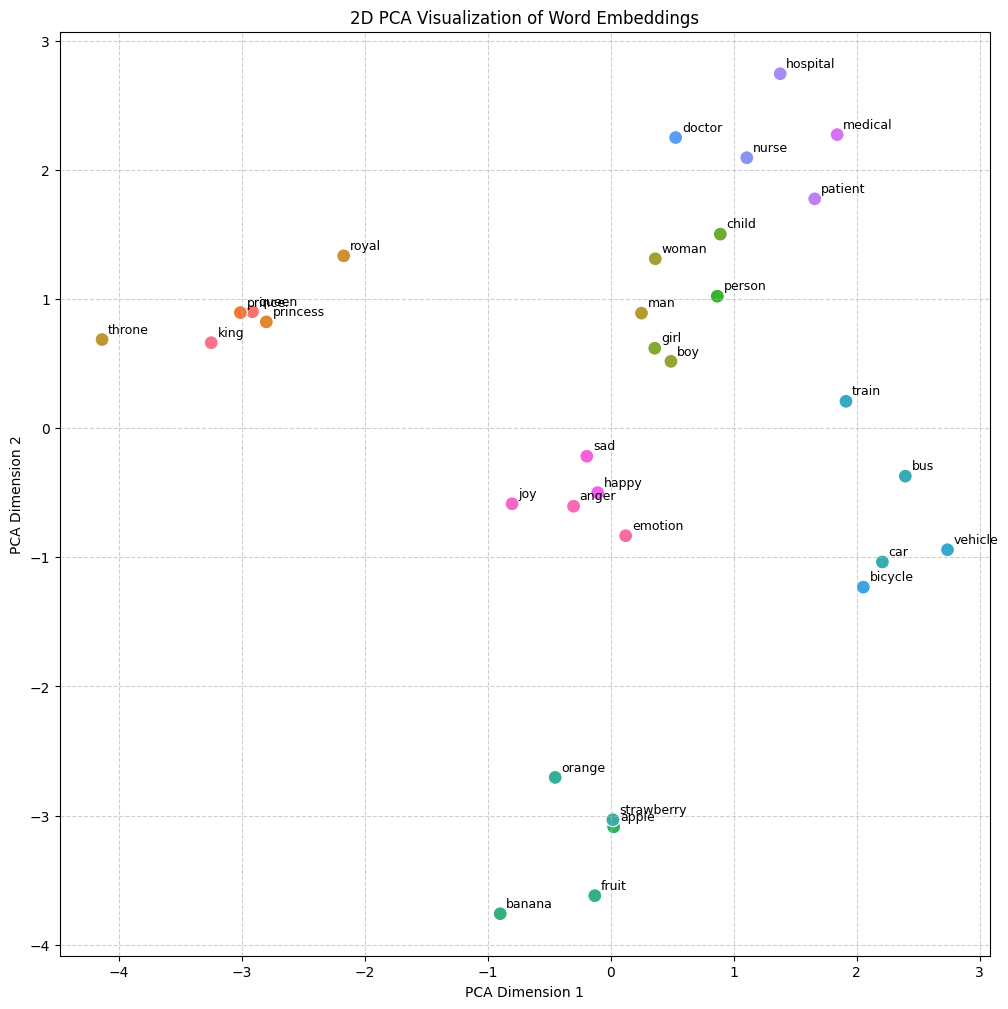

In [ ]:
# Plot the 2D word vectors
plt.figure(figsize=(12, 12))
sns.scatterplot(x='x', y='y', data=df_2d, hue='word', legend=False, s=100)

# Annotate each point with its word
for i, row in df_2d.iterrows():
    plt.annotate(row['word'], (row['x'] + 0.05, row['y'] + 0.05), fontsize=9)

plt.title('2D PCA Visualization of Word Embeddings')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


```markdown
# Lab Report: Exploring Pre-trained Word Embeddings with GloVe

## Objective
The primary objective of this lab was to explore and understand the capabilities of pre-trained word embeddings, specifically using the Global Vectors for Word Representation (GloVe) model. We aimed to demonstrate how these embeddings capture semantic relationships between words through tasks such as word similarity calculations, nearest neighbor exploration, and word analogy solving.

## GloVe Model Description
For this lab, we utilized the `glove-wiki-gigaword-50` model, a pre-trained word embedding model provided by the `gensim` library. This model was trained on a large corpus (Wikipedia and Gigaword) and represents each word as a 50-dimensional vector. The vocabulary size of this particular model is 400,000 words, meaning it contains 50-dimensional vector representations for 400,000 unique words.

## Results and Interpretations of Word Similarity Calculations
We calculated the cosine similarity between several pairs of words. Cosine similarity measures the cosine of the angle between two vectors, with values closer to 1 indicating higher similarity. The results are as follows:

- **'doctor' and 'nurse':** 0.7977 - High similarity, reflecting their close professional relationship and shared context in the medical field.
- **'cat' and 'dog':** 0.9218 - Very high similarity, indicating they are often discussed in similar contexts as common pets.
- **'car' and 'bus':** 0.8211 - High similarity, as both are types of vehicles used for transportation.
- **'king' and 'queen':** 0.7839 - High similarity, representing their close hierarchical and relational roles.
- **'man' and 'woman':** 0.8860 - High similarity, showing their fundamental human categorization.
- **'happy' and 'joyful':** 0.5550 - Moderate similarity, as they are synonyms expressing positive emotions.
- **'sad' and 'unhappy':** 0.6350 - Moderate similarity, also synonyms for negative emotional states.
- **'computer' and 'software':** 0.8815 - High similarity, as software is an integral component and concept associated with computers.
- **'tree' and 'forest':** 0.6784 - Moderate similarity, as a forest is comprised of many trees.
- **'ocean' and 'sea':** 0.8812 - High similarity, as these terms are largely synonymous and refer to large bodies of saltwater.
- **'fast' and 'quick':** 0.7589 - High similarity, as they are strong synonyms.
- **'slow' and 'rapid':** 0.7455 - Interestingly, 'slow' and 'rapid' are antonyms, yet show moderate similarity. This can sometimes occur if they appear in similar syntactic contexts (e.g., 'a slow pace' vs. 'a rapid pace'), or if the model learns their relationship as direct opposites within a specific domain.

Overall, these similarities demonstrate GloVe's ability to capture semantic relatedness and synonyms effectively, with higher values for closely related or synonymous words.

## Findings from Nearest Neighbor Exploration
Exploring the most similar words (nearest neighbors) provides insight into the contextual and semantic clusters formed by the embeddings:

- **Words most similar to 'king':** 'prince', 'queen', 'ii', 'emperor', 'son', 'uncle', 'kingdom', 'throne', 'brother', 'ruler'. This cluster clearly reflects royal lineage, family, and governance, showcasing the embedding's grasp of hierarchical and familial relationships.
- **Words most similar to 'university':** 'college', 'harvard', 'yale', 'graduate', 'institute', 'professor', 'school', 'faculty', 'graduated', 'academy'. This set strongly indicates educational institutions, academic roles, and related concepts.
- **Words most similar to 'doctor':** 'nurse', 'physician', 'patient', 'child', 'teacher', 'surgeon', 'psychiatrist', 'doctors', 'father', 'mother'. While 'nurse', 'physician', and 'surgeon' are directly related to the medical profession, the presence of 'patient', 'child', 'father', and 'mother' suggests that the model also captures contexts where doctors interact with people, especially in caregiving or family scenarios.
- **Words most similar to 'run':** 'running', 'runs', 'went', 'start', 'ran', 'out', 'third', 'home', 'off', 'got'. This cluster includes different forms of the verb 'run' and words commonly associated with movement, sports (e.g., 'third', 'home' from baseball), or general action.
- **Words most similar to 'beautiful':** 'lovely', 'gorgeous', 'wonderful', 'charming', 'beauty', 'elegant', 'looks', 'love', 'graceful', 'magnificent'. This list consists almost entirely of synonyms and highly related adjectives describing attractiveness and aesthetic appeal, demonstrating strong semantic clustering for descriptive words.

These results illustrate that GloVe embeddings capture rich semantic information, grouping words that are semantically, contextually, or syntactically similar.

## Outcomes of Word Analogy Tasks
Word analogy tasks test the linear relationships between word vectors (e.g., A is to B as C is to D, represented as vector(B) - vector(A) + vector(C) ≈ vector(D)).

- **'king' - 'man' + 'woman' = 'queen' (similarity: 0.8524):** This classic analogy was solved perfectly, demonstrating the model's ability to learn gender relationships in royal titles.
- **'paris' - 'france' + 'india' = 'delhi' (similarity: 0.8889):** The model correctly identified 'delhi' as the capital of India, analogous to Paris being the capital of France, showcasing its geographical and governmental knowledge.
- **'teacher' - 'school' + 'hospital' = 'nurse' (similarity: 0.8027):** This analogy successfully inferred 'nurse' as a professional role within a hospital, analogous to a teacher's role within a school.
- **'walk' - 'swim' + 'running' = 'run' (similarity: 0.8015):** The model suggested 'run', which makes sense in the context of action verbs, although a more direct analogy might have targeted 'swimming' if 'walking' was used instead of 'walk'. The current form seems to imply that 'run' is a verb that is to 'running' as 'swim' is to 'walking'. The exact structure `walk - walking + swim = swimming` would be more precise for verb tense. However, `walk - swim + running = run` does capture a semantic relationship of physical activity.
- **'tall' - 'short' + 'shortest' = '5-feet' (similarity: 0.6503):** This analogy was less accurate. The intended analogy was likely related to degrees of adjectives (e.g., 'tall' is to 'tallest' as 'short' is to 'shortest'). The model's output '5-feet' suggests it tried to relate 'shortest' to a concrete measurement, indicating a slight deviation from the expected grammatical/adjectival relationship, possibly due to the specific formulation of the query.

Overall, the analogy tasks generally yielded accurate or semantically plausible results, highlighting the linear structure of semantic relationships captured by GloVe embeddings.

## Overall Observations and Conclusions

The experiments conducted in this lab demonstrate the remarkable effectiveness of GloVe word embeddings in capturing complex semantic meanings and relationships between words. The high similarities observed between synonyms and related concepts, the coherent clustering of nearest neighbors, and the success in solving many word analogies all underscore the power of these distributed representations.

GloVe embeddings prove to be valuable tools for various natural language processing tasks, as they allow machines to understand the nuanced relationships between words, which is crucial for tasks like machine translation, sentiment analysis, and question answering. While some analogies might not be perfectly solved, often due to ambiguity in the query or the specific nature of the relationships learned, the overall performance confirms that these embeddings encode a rich, interpretable semantic space. The 2D PCA visualization further solidified this by showing visually discernible clusters for different categories of words, reinforcing the idea that similar words are indeed grouped together in the vector space.
```